<a href="https://colab.research.google.com/github/iyadh97/food-sales-predictions/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project 1 - Part 2 (Core)**
We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

In [105]:
#import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import pandas as pd
filename='/content/sales_predictions_2023.csv'

In [107]:
df_sales_predictions=pd.read_csv(filename)
df_sales_predictions.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### **For Part 2**,
 your task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

* Your data should already be loaded into your notebook from part 1 of the project.
* Explore the data - what do you need to do to clean this data? Clean it!  
* Be sure to address each of the following tasks:

**1) How many rows and columns?**

In [108]:
df_sales_predictions.shape

(8523, 12)

In [109]:
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3) Are there duplicates? If so, drop any duplicates.**

In [110]:
df_sales_predictions.duplicated().sum()
#output : 0 there are no duplicates in this dataframe


0

In [111]:
# Remove duplicates
df_sales_predictions = df_sales_predictions.drop_duplicates()

**4) Identify missing values.**

In [112]:
df_sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

In [113]:
# Fill missing values with mean for Item_Weight
df_sales_predictions['Item_Weight'].fillna(df_sales_predictions['Item_Weight'].mean(), inplace=True)


In [114]:
# Fill missing values with mode for Outlet_Size
df_sales_predictions['Outlet_Size'].fillna(df_sales_predictions['Outlet_Size'].mode()[0], inplace=True)

In [115]:
df_sales_predictions.sample(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4766,FDJ02,17.200000,Regular,0.025162,Canned,145.9418,OUT035,2004,Small,Tier 2,Supermarket Type1,1765.7016
6015,FDJ44,12.857645,Regular,0.105812,Fruits and Vegetables,175.0396,OUT027,1985,Medium,Tier 3,Supermarket Type3,4012.1108
7353,FDC59,16.700000,reg,0.091438,Starchy Foods,64.3168,OUT010,1998,Medium,Tier 3,Grocery Store,127.8336
4075,FDU19,12.857645,Regular,0.046545,Fruits and Vegetables,172.0422,OUT027,1985,Medium,Tier 3,Supermarket Type3,4828.3816
74,NCZ18,7.825000,low fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
5790,FDJ48,11.300000,Low Fat,0.094460,Baking Goods,245.3118,OUT010,1998,Medium,Tier 3,Grocery Store,247.0118
6511,FDK38,12.857645,low fat,0.053032,Canned,149.1734,OUT027,1985,Medium,Tier 3,Supermarket Type3,4454.2020
6132,FDA04,11.300000,reg,0.067002,Frozen Foods,259.1962,OUT018,2009,Medium,Tier 3,Supermarket Type2,5438.9202
3645,FDU32,12.857645,Low Fat,0.045466,Fruits and Vegetables,120.8414,OUT019,1985,Small,Tier 1,Grocery Store,852.8898
4637,FDB14,12.857645,Regular,0.000000,Canned,92.3120,OUT019,1985,Small,Tier 1,Grocery Store,372.8480


1. In this approach, I filled the missing values in the "**Item_Weight**" column with the mean of the available values. This is a reasonable choice as the mean provides a representative value without significantly affecting the overall distribution.

2. For the "**Outlet_Size**" column, I filled the missing values with the mode (most frequent value) of the column. This is a suitable choice as the mode represents the most common outlet size and can help maintain the consistency of the data.
*************************************

6) Confirm that there are no missing values after addressing them.

In [116]:
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [117]:
df_sales_predictions.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [118]:
# Identify categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size',
                       'Outlet_Location_Type', 'Outlet_Type']

# Inspect unique values in each categorical column
for column in categorical_columns:
    unique_values = df_sales_predictions[column].unique()
    print(f"\nUnique values in {column}: {unique_values}")


Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Size: ['Medium' 'High' 'Small']

Unique values in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**there are some inconsistent categories in the 'Item_Fat_Content' column.**

In [119]:
df_sales_predictions['Item_Fat_Content']=df_sales_predictions['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

print(f"\nUnique values in Item_Fat_Content column are : {df_sales_predictions['Item_Fat_Content'].unique()}")



Unique values in Item_Fat_Content column are : ['Low Fat' 'Regular']


**8) For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [120]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
# Obtain summary statistics of numerical columns
summary_stats = df_sales_predictions[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].describe()

# Display the summary statistics
summary_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **Project 1 - Part 3 (Core)**
We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.

In [122]:
df_sales_predictions.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5220,DRG39,14.15,Low Fat,0.042181,Dairy,52.0982,OUT046,1997,Small,Tier 1,Supermarket Type1,578.5802
415,FDC15,18.10,Low Fat,0.178976,Dairy,155.5288,OUT017,2007,Medium,Tier 2,Supermarket Type1,1571.2880
987,NCJ31,19.20,Low Fat,0.182502,Others,239.2196,OUT013,1987,High,Tier 3,Supermarket Type1,5061.4116
8116,DRN35,8.01,Low Fat,0.117580,Hard Drinks,36.6532,OUT010,1998,Medium,Tier 3,Grocery Store,71.9064
3920,FDE35,7.06,Regular,0.043969,Starchy Foods,57.6904,OUT049,1999,Medium,Tier 1,Supermarket Type1,585.9040


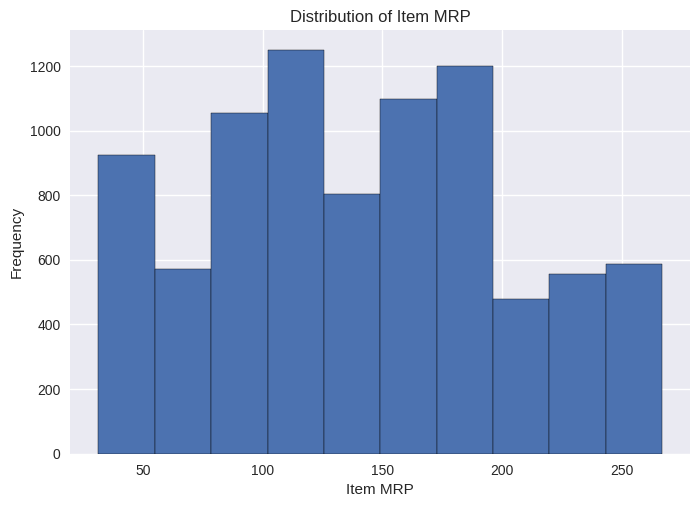

In [123]:
# Plot histogram for 'Item_MRP'
plt.hist(df_sales_predictions['Item_MRP'], bins=10, edgecolor='k')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.title('Distribution of Item MRP')
plt.show()

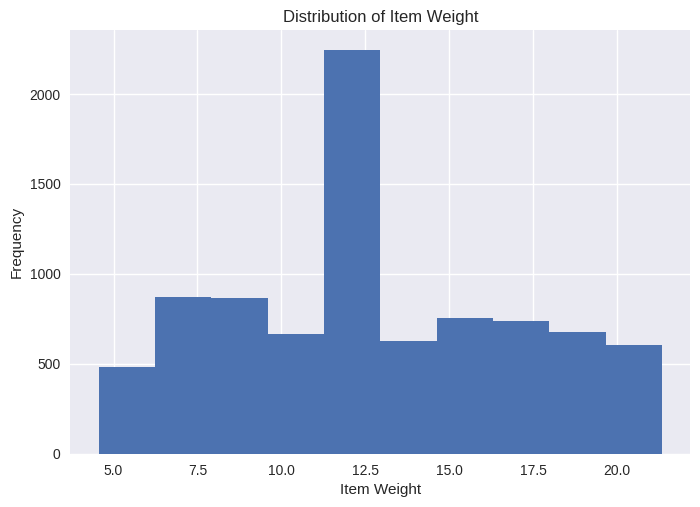

In [124]:
plt.hist(df_sales_predictions['Item_Weight'], bins=10)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Item Weight')
plt.show()

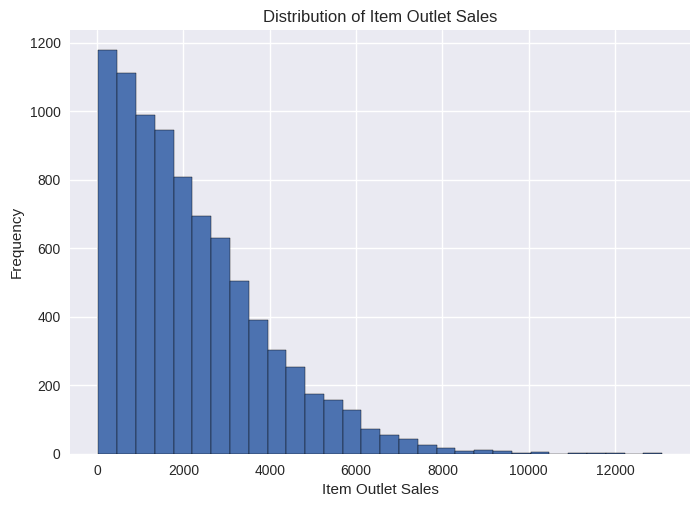

In [125]:
plt.hist(df_sales_predictions['Item_Outlet_Sales'], bins=30,edgecolor='k')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Item Outlet Sales')
plt.show()

**we can see that the number of outlet sales is decreasing while the price is increasing**
* this is a Right-skewed distribution (positively skewed)

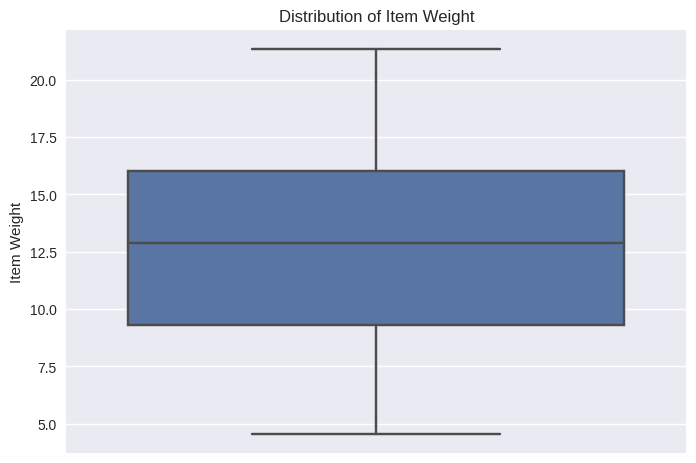

In [126]:

sns.boxplot(data=df_sales_predictions, y='Item_Weight')
plt.ylabel('Item Weight')
plt.title('Distribution of Item Weight')
plt.show()

The box plot is comparatively short This suggests that overall Weight of items  have a high level. The longer the box, the more dispersed the data. The smaller, the less dispersed the data.

the median is closer to the top of the box, and the whisker is shorter on the upper end of the box, so the distribution is negatively skewed (skewed left).

Outliers: There are no outliers in the item weight boxplot.

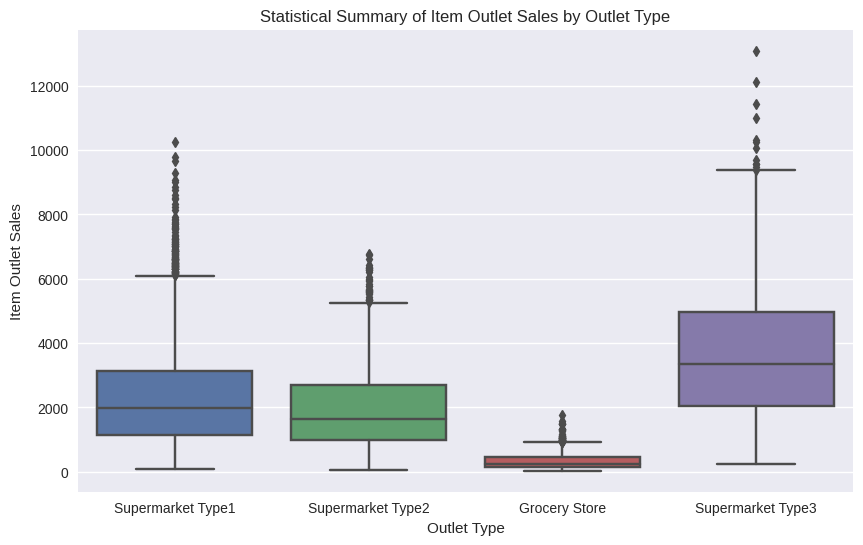

In [127]:
# Create boxplot for 'Item_Outlet_Sales' by 'Outlet_Type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sales_predictions, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Statistical Summary of Item Outlet Sales by Outlet Type')
plt.show()

The supermarket Type 3 has the highest median than the other boxes. Therefore The supermarket Type 3 box did better on average as it have the largest median.

in the box plot below it can be seen that The supermarket Type 3 box has a larger spread than the others:

The supermarket Type 3 box has a longer plot from whisker to whisker. Therefore it has a larger range. On a boxplot we can see this visually.

The supermarket Type 3 box has a longer box portion of the boxplot and so, it has a larger interquartile range. We can also see this visually.

Because Grocery Store box has the smallest range and interquartile range, it has the most consistent results.

all 4 boxes have a positive skew(Right skew) with the highest number of outliers in The supermarket Type 1 box compared to the other boxes

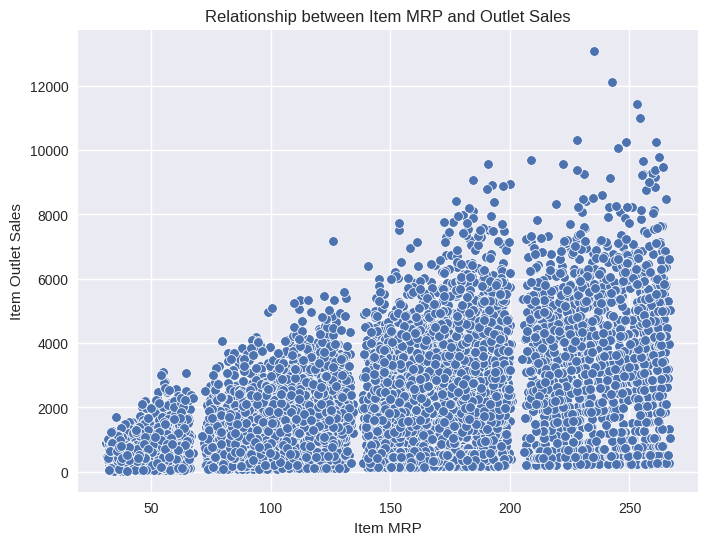

In [128]:
#Scatter Plot of Item MRP vs. Item Outlet Sales:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sales_predictions, x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item MRP and Outlet Sales')
plt.show()

This scatter plot shows the relationship between the item maximum retail price (MRP) and the corresponding outlet sales. Each point on the plot represents a specific item, with its MRP on the x-axis and the sales generated from the outlet on the y-axis. The plot helps identify any potential correlation or patterns between the MRP and sales, such as whether higher-priced items tend to generate higher sales.

**and in this case the higher the item MRP is, the higher sales (item outlet_sales) it generates**

### PS:MRP definition "to refresh memory"
* MRP, the Maximum Retail Price is the full form of MRP. The manufacturer of a product calculates it, and it is the highest possible price one can charge for that product from a customer. It comprises all the taxes levied on that product.

* The objective of having a maximum retail price is to ensure that the customers are not charged anything beyond that amount. Moreover, with MRP printed on a product’s packaging, sellers’ scope to sell goods to customers at a higher price becomes negligible. Therefore, it restricts the shopkeepers from fooling the customers by charging anything above the product’s printed price.
*******************************

<ipython-input-129-1c40cc03bc7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_sales_predictions.corr()


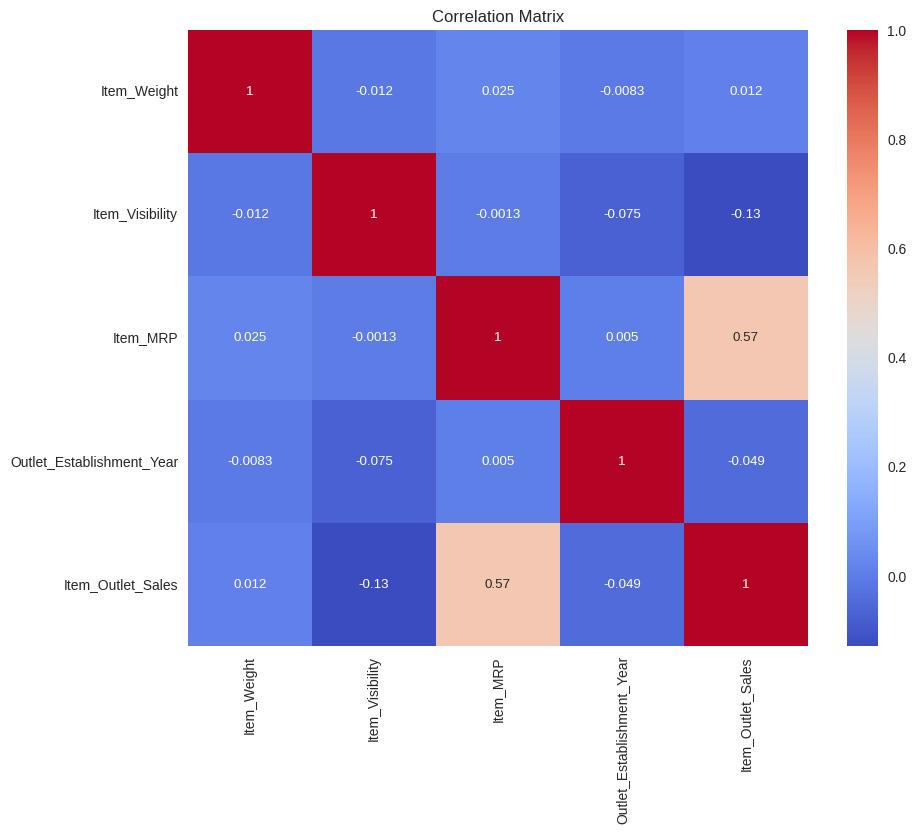

In [129]:
plt.figure(figsize=(10, 8))
corr_matrix = df_sales_predictions.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

After plotting the heatmap, we can observe a correlation coefficient of 0.57 between the item outlet sales and the item MRP. This correlation coefficient value indicates a moderate positive correlation between the two variables.
This means that there is a tendency for higher sales to be associated with higher MRPs, but the relationship is not extremely strong.

# **Part 4**

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

In [130]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
df_sales_predictions.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)


In [132]:
df_sales_predictions

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


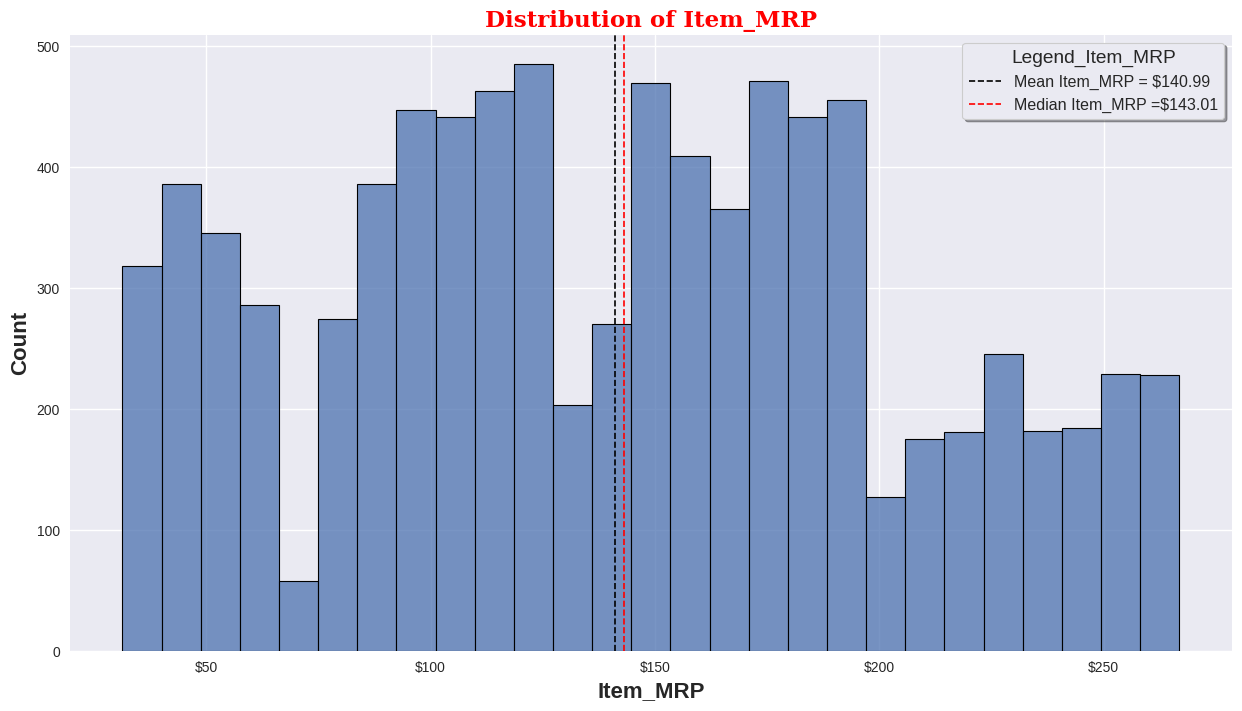

In [133]:
import matplotlib as mpl

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

## Plot histogram
sns.histplot(data=df_sales_predictions, x='Item_MRP', ax=ax)

ax.set_title('Distribution of Item_MRP',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red');

## Annotating mean and median
mean_Item_MRP = df_sales_predictions['Item_MRP'].mean()
ax.axvline(mean_Item_MRP, color='k', ls='--', label=f"Mean Item_MRP = ${mean_Item_MRP:.2f}")

med_Item_MRP = df_sales_predictions['Item_MRP'].median()
ax.axvline(med_Item_MRP, color='r', ls='--', label=f"Median Item_MRP =${med_Item_MRP:.2f}") #OR round(med_price,2)

plt.xlabel('Item_MRP', fontsize = 16,fontweight='bold')
plt.ylabel('Count', fontsize = 16,fontweight='bold')

plt.legend(title ='Legend_Item_MRP',title_fontsize='x-large',loc='best',frameon=True,fontsize='large',shadow=True);

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(price_fmt)
## Get the fig and ax from our function
plt.show()



In [134]:
import matplotlib as mpl
price_fmt= '${x:,.0f}'
weight_fmt= '{x:,.0f}kg'


## functionize the above plot and call it plot_dist
def plot_dist(data, col, title,fmt,figure_size=(10,5)):
  ## Plot histogram
  fig, ax = plt.subplots(figsize=figure_size)

  ## Plot histogram
  sns.histplot(data=data,x=col,ax=ax)
  ax.set_title(title);


  ## Annotating mean and median
  mean_ = data[col].mean()
  ax.axvline(mean_,color='slategray', ls='--', lw=3,
            label=f"Mean= {mean_:,.2f}");

  med_ = data[col].median()
  ax.axvline(med_,color='skyblue', ls=':', lw=3,
            label=f"Median= {med_:,.2f}");
  ax.legend();

  fmt = mpl.ticker.StrMethodFormatter(fmt)
  ax.xaxis.set_major_formatter(fmt)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


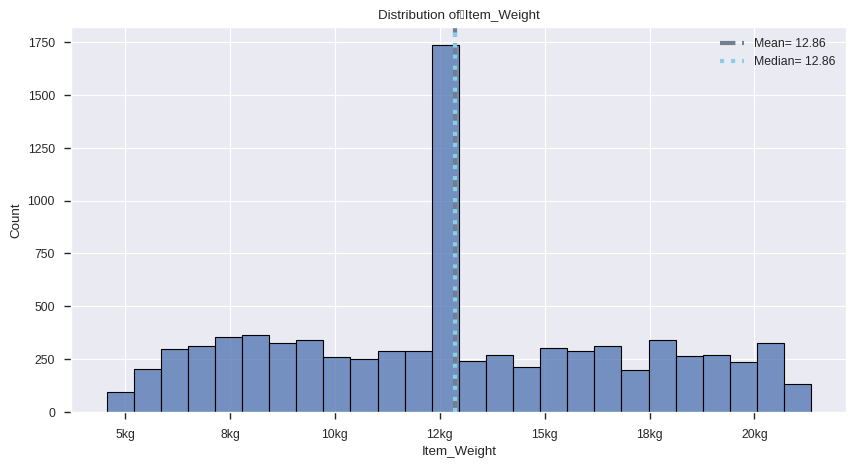

In [135]:
plot_dist(df_sales_predictions,'Item_Weight',"Distribution of	Item_Weight",weight_fmt);



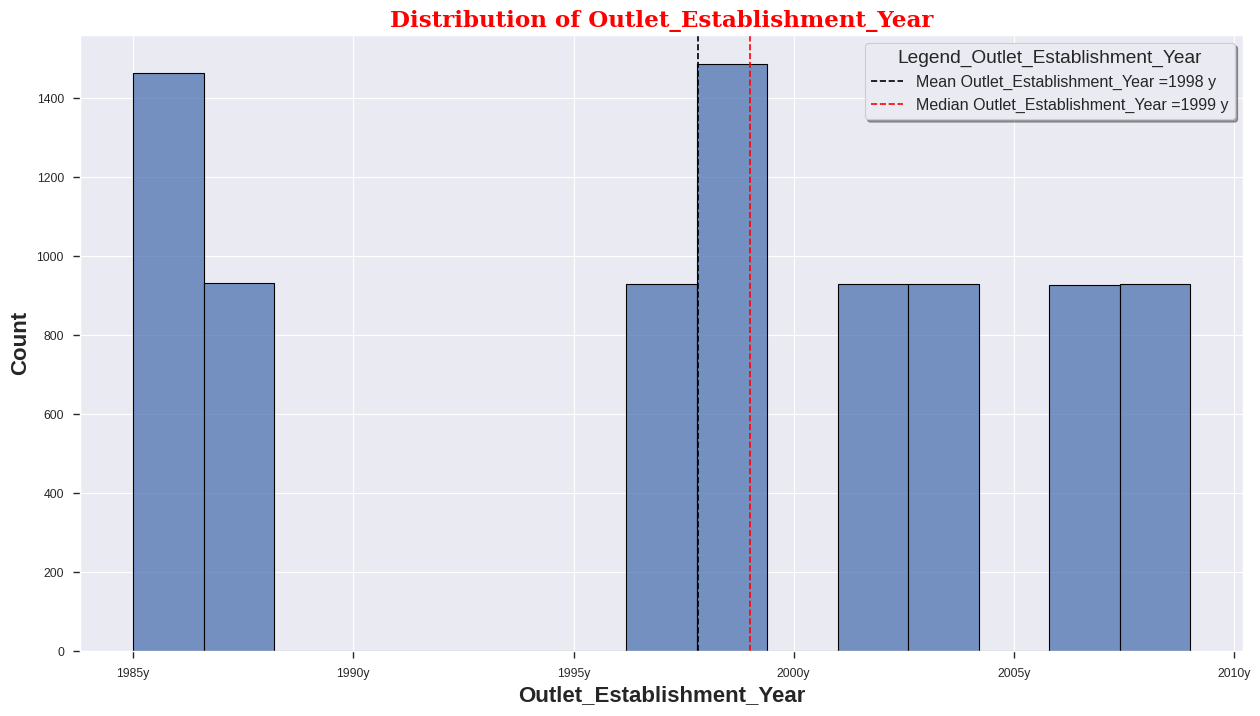

In [136]:

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

## Plot histogram
sns.histplot(data=df_sales_predictions, x='Outlet_Establishment_Year', ax=ax)

ax.set_title('Distribution of Outlet_Establishment_Year',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red');

## Annotating mean and median
mean_Outlet_Establishment_Year = df_sales_predictions['Outlet_Establishment_Year'].mean()

ax.axvline(mean_Outlet_Establishment_Year, color='k', ls='--', label=f"Mean Outlet_Establishment_Year ={mean_Outlet_Establishment_Year:.0f} y")

med_Outlet_Establishment_Year = df_sales_predictions['Outlet_Establishment_Year'].median()
ax.axvline(med_Outlet_Establishment_Year, color='r', ls='--', label=f"Median Outlet_Establishment_Year ={med_Outlet_Establishment_Year:.0f} y") #OR round(med_price,2)

plt.xlabel('Outlet_Establishment_Year', fontsize = 16,fontweight='bold')
plt.ylabel('Count', fontsize = 16,fontweight='bold')

plt.legend(title ='Legend_Outlet_Establishment_Year',title_fontsize='x-large',loc='best',frameon=True,fontsize='large',shadow=True);

## Make price_fmt using the StrMethodFormatter and the appropriate format code
year_fmt = mpl.ticker.StrMethodFormatter('{x:.0f}y')
ax.xaxis.set_major_formatter(year_fmt)
## Get the fig and ax from our function
plt.show()

In [137]:
df_sales_predictions.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


<ipython-input-138-47e1453495aa>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


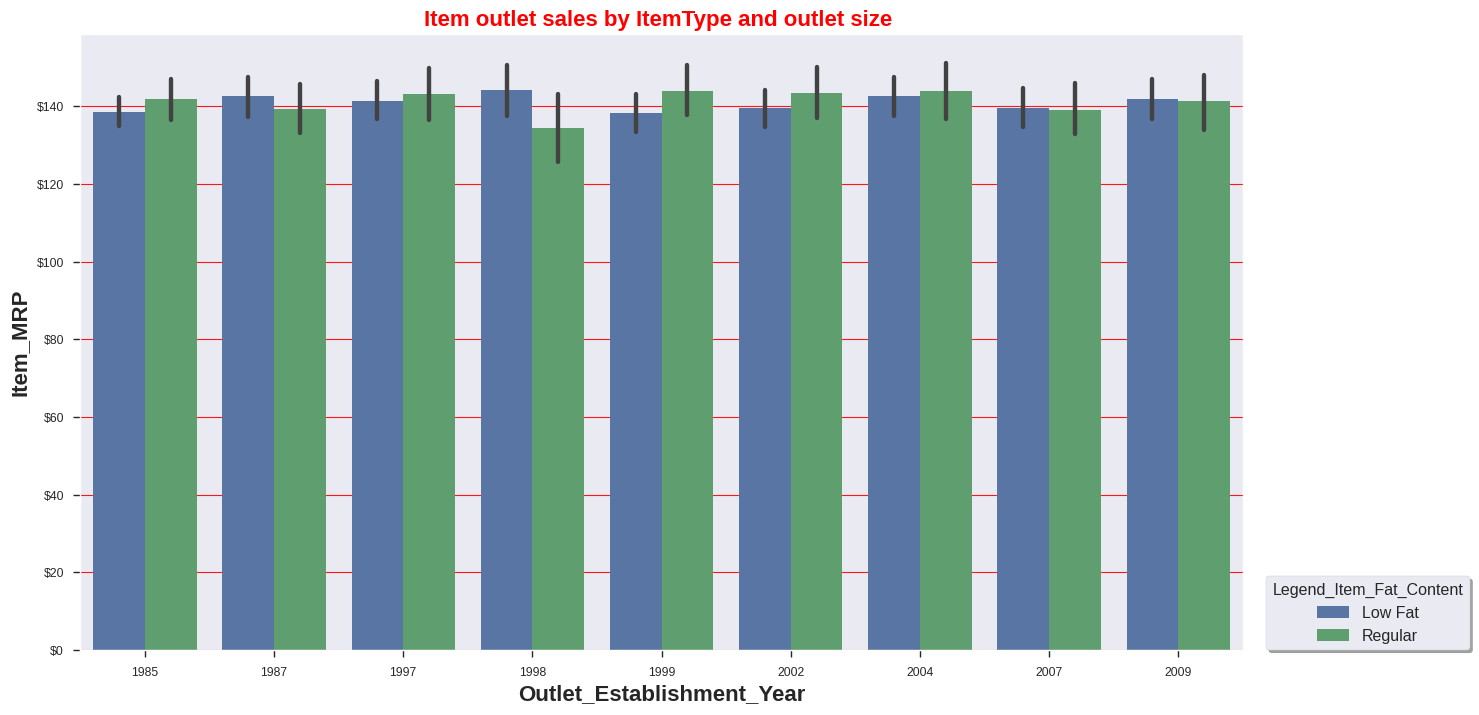

In [138]:

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

plt.style.use('seaborn')

sns.barplot(data=df_sales_predictions, y='Item_MRP',x='Outlet_Establishment_Year',hue='Item_Fat_Content');

#plt.xticks(rotation = 45);
plt.title('Item outlet sales by ItemType and outlet size ',fontsize = 16,color='red',fontweight='bold');
plt.grid(axis = 'y',
         c='red',
         alpha = .9,linestyle = '-')

plt.xlabel('Outlet_Establishment_Year', fontsize = 16,fontweight='bold')
plt.ylabel('Item_MRP', fontsize = 16,fontweight='bold')

## Make mrp_fmt using the StrMethodFormatter and the appropriate format code
mrp_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.yaxis.set_major_formatter(mrp_fmt)


plt.legend(title ='Legend_Item_Fat_Content',title_fontsize='large',loc=(1.02,0),frameon=True,fontsize='large',shadow=True);

<ipython-input-139-1d48fbaea699>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


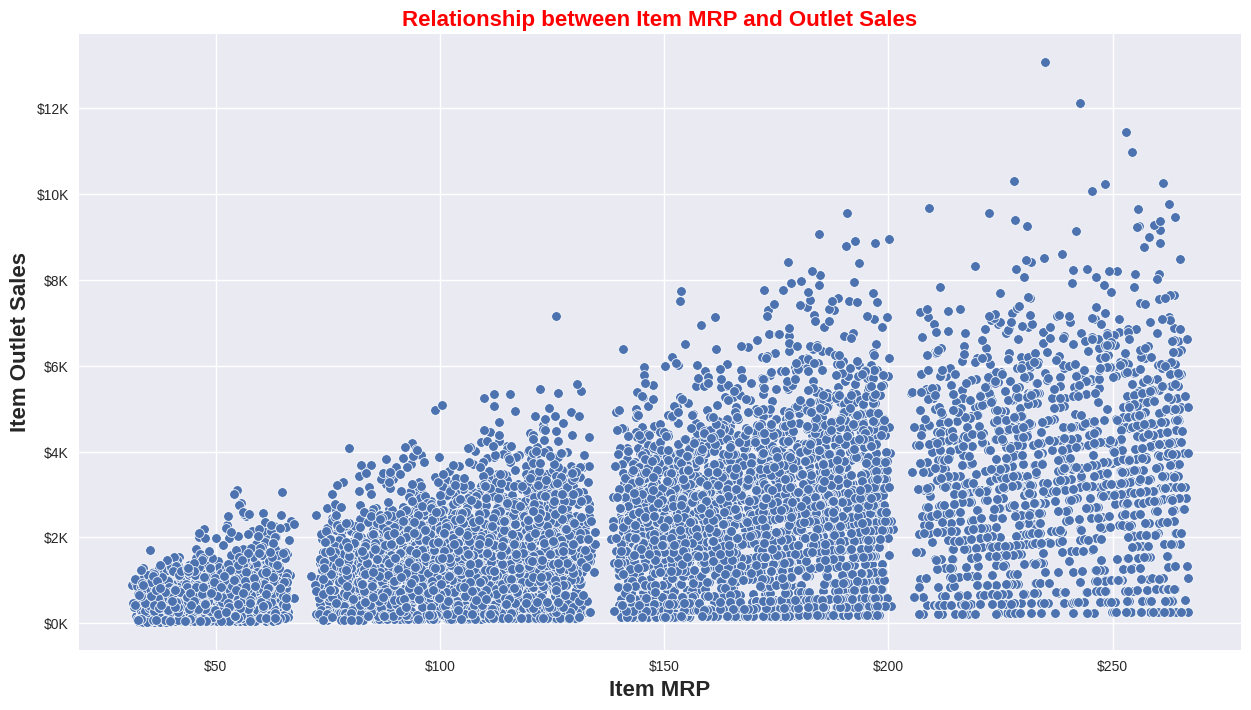

In [139]:
from matplotlib.ticker import FuncFormatter
def hundred_k(y,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousand"""
    return f"${y*1e-3:,.0f}K"

#Scatter Plot of Item MRP vs. Item Outlet Sales:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

plt.style.use('seaborn')


sns.scatterplot(data=df_sales_predictions, x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP', fontsize = 16,fontweight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.title('Relationship between Item MRP and Outlet Sales',fontsize = 16,color='red',fontweight='bold');
## Set the axis' major formatter

sales_fmt_100k = FuncFormatter(hundred_k)
ax.yaxis.set_major_formatter(sales_fmt_100k)

mrp_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.xaxis.set_major_formatter(mrp_fmt)
plt.show()

<ipython-input-140-3ad9d5e3dce3>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


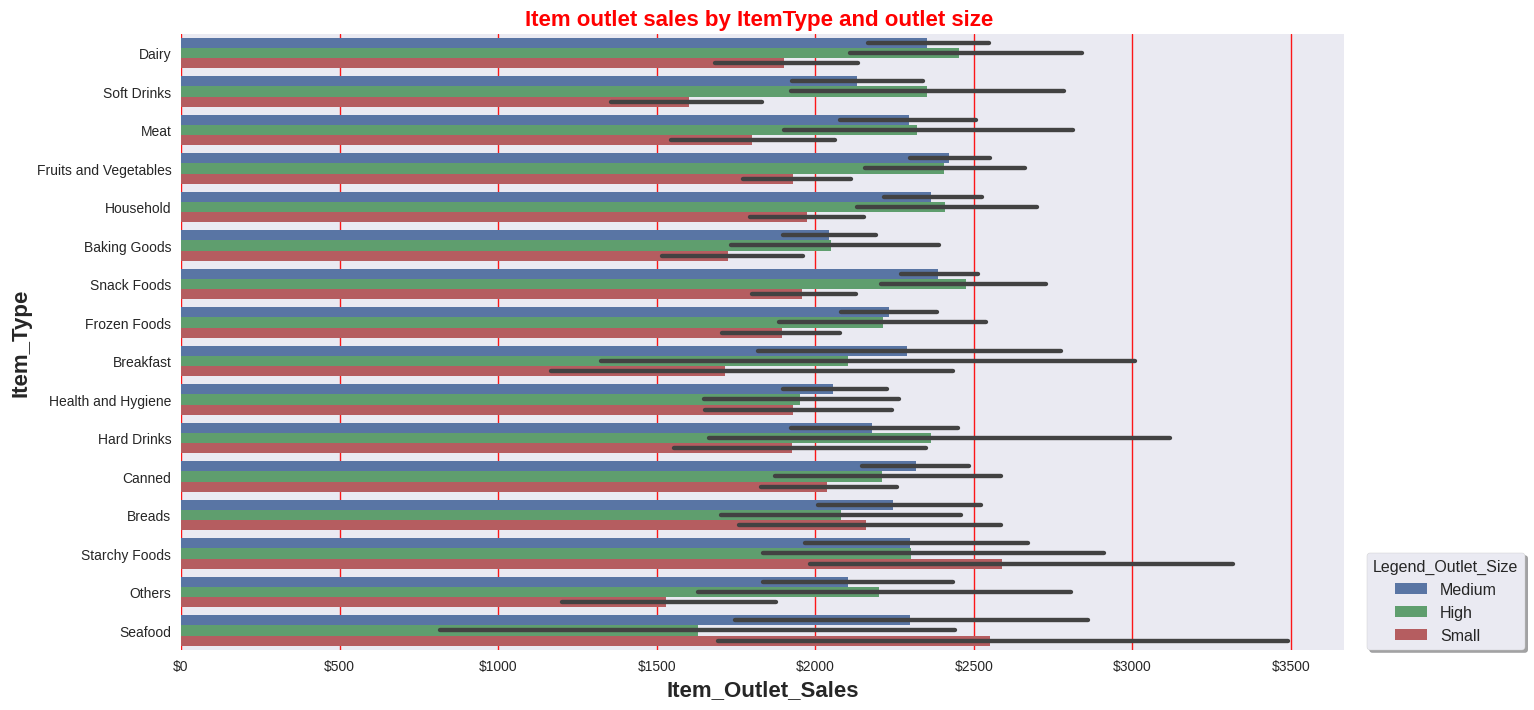

In [140]:
from matplotlib.ticker import FuncFormatter


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))


plt.style.use('seaborn')
sns.barplot(data=df_sales_predictions, x='Item_Outlet_Sales', y='Item_Type',hue='Outlet_Size');

#plt.xticks(rotation = 45);
plt.xlabel('Item_Outlet_Sales', fontsize = 16,fontweight='bold')
plt.ylabel('Item_Type', fontsize = 16,fontweight='bold')

plt.title('Item outlet sales by ItemType and outlet size ',fontsize = 16,color='red',fontweight='bold');
plt.grid(axis = 'x',
         c='red',
         alpha = .9,linestyle = '-')
plt.legend(title ='Legend_Outlet_Size',title_fontsize='large',loc=(1.02,0),frameon=True,fontsize='large',shadow=True);

sales_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.xaxis.set_major_formatter(sales_fmt)

**Using this barplot, we can observe all the Item outlet sales by ItemType (Frozen Foods, Seafood, soft Drinks etc...) and outlet size (small, medium and high)**

-------------
-------------

# **Project 1 - Part 5 (Core):**


We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

We should load a fresh version of the original data set here using pd.read_csv() and start the cleaning process over to ensure there is no data leakage!

https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view

* Before splitting the data, we can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, we may perform this step before the split)
* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as our target and the rest of the relevant variables as our features matrix.
* Perform a train test split
* Create a preprocessing object to prepare the dataset for Machine Learning
* Make sure our imputation of missing values occurs after the train test split using SimpleImputer.

Commit work to GitHub.

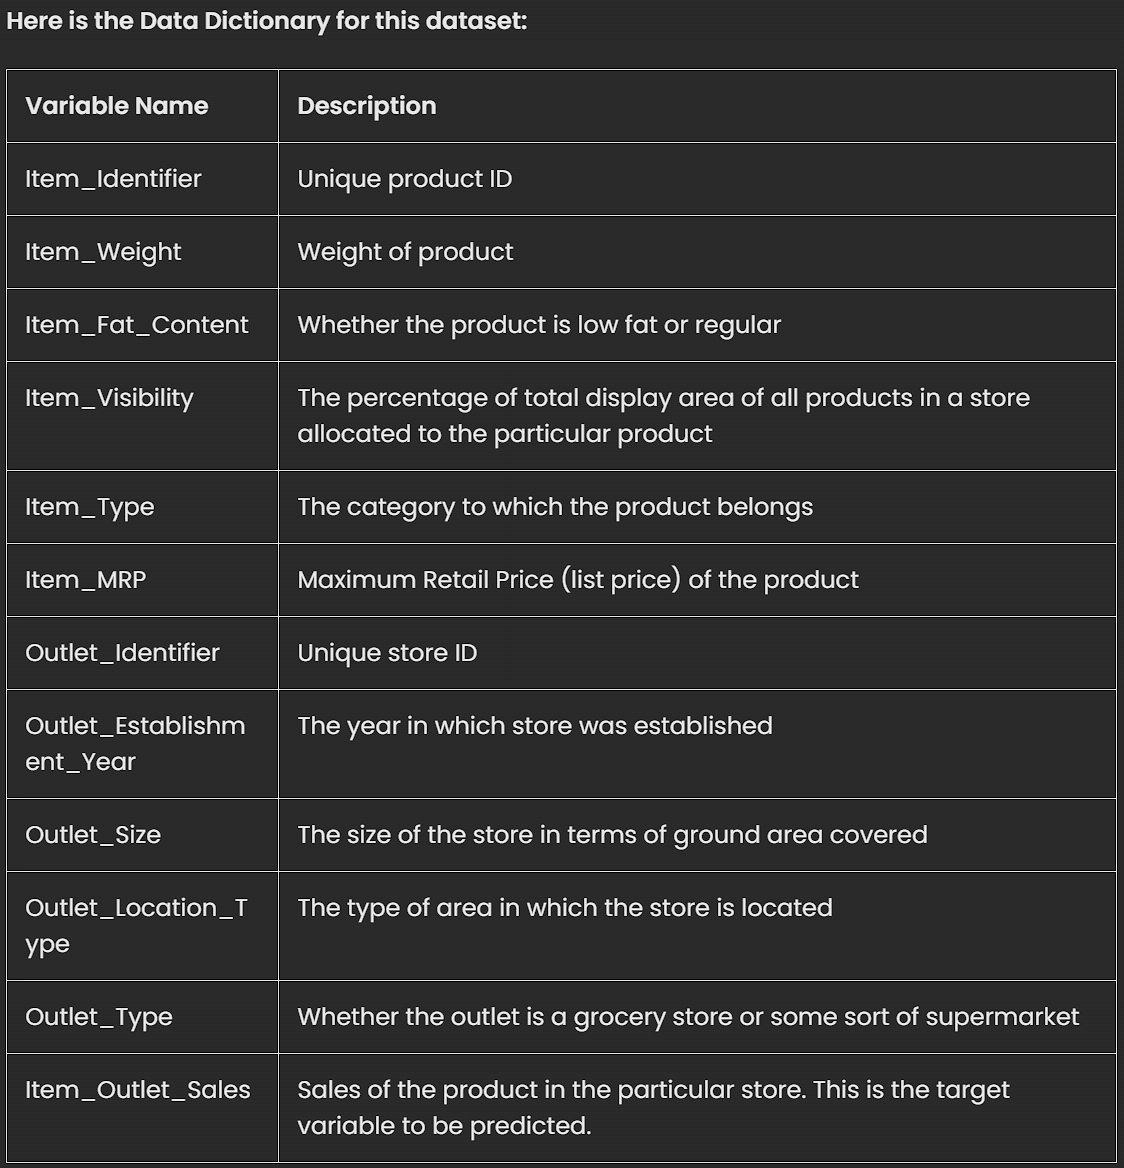

In [141]:
# Import packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [142]:
filename='/content/sales_predictions_2023.csv'

df_sales_prediction=pd.read_csv(filename)


df_sales_prediction.info()
print("------------------------------------------\n")
df_sales_prediction.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
------------------------------------------



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [143]:
df_sales_prediction.duplicated().sum()
#output : 0 there are no duplicates in this dataframe


0

The dataset does not contain any duplicated rows that need to be dropped. All the rows are unique and do not require any further processing to handle duplicates.

In [144]:
df_sales_prediction.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we will deal the missing values and address them after the split to **avoid any data leakage**

In [145]:
# Identify categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size',
                       'Outlet_Location_Type', 'Outlet_Type']

# Inspect unique values in each categorical column
for column in categorical_columns:
    unique_values = df_sales_prediction[column].unique()
    print(f"\nUnique values in {column}: {unique_values}")



Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Size: ['Medium' nan 'High' 'Small']

Unique values in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [146]:
df_sales_prediction['Item_Fat_Content']=df_sales_prediction['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])
print(f"\nUnique values in Item_Fat_Content column are : {df_sales_prediction['Item_Fat_Content'].unique()}")



Unique values in Item_Fat_Content column are : ['Low Fat' 'Regular']


In [147]:
# Obtain summary statistics of numerical columns
summary_stats = df_sales_prediction.select_dtypes("number").describe()
# Display the summary statistics
summary_stats



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Separate the data into the feature matrix (X) and the target vector (y)
Item_Outlet_Sales will be the target y
The rest of the features will be X
the random number 42 for consistency.

In [148]:
# Define features and target
X = df_sales_prediction.drop(columns = ['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
y = df_sales_prediction['Item_Outlet_Sales']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## **Create a ColumnTransformer to preprocess the data.**

* 1)Creating lists of column names for numeric and categorical columns.
* 2)Creating a StandardScaler for scaling numeric columns.
* 3)Creating a OneHotEncoder for one-hot encoding the categorical columns.
* 4)Creating a tuple for each transformer with the: name, the transformer object, and the list of columns.
* 5)Using the tuples to create a ColumnTransformer to preprocess the data. Make sure to set verbose_feature_names_out to False!

### **1)Create Pipelines and Define Tuples**

* <font color ='red'> **Numeric Pipeline**

Our numeric pipeline will:

     1) Impute missing values with the mean.

     2) Scale the data.

In [149]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe


Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### **Define Numeric Tuple for ColumnTransformer**

**Note:When we create the column transformer, we will need a tuple for each pipeline that contains 3 things:**

* the name we want to use for the pathway.
  * (We will call this pipeline "numeric".)
* the pipeline or transformer.
  * (We will use the num_pipe we just created.)
* the list of column names that should be sent through the pathway.
  * (We will apply this to the previously defined num_cols.)

In [150]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

* <font color ='red'> **Ordinal Pipeline**

Our ordinal pipeline will:

* 1) Impute missing values with "NA".
* 2) Encode the features ordinally.
* 3) Scale the encoded features.

In [151]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_col = ["Outlet_Size"]
print("Ordinal Column:", ord_col)

# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='most_frequent')

## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['Small','Medium', 'High']

# Making the list of order lists for OrdinalEncoder
ordinal_category_order = [qual_cond_order]

ord_encoder = OrdinalEncoder(categories=ordinal_category_order,handle_unknown='use_encoded_value', unknown_value=-1)

# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()

## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Column: ['Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='most_frequent',
                               strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']],
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('standardscaler', StandardScaler())])

### **Define Ordinal Tuple for ColumnTransformer**

When we create the column transformer, we will need a tuple for each pipeline that contains 3 things:

* the name we want to use for the pathway.
  * (We will call this "ordinal".)
* the pipeline or transformer.
  * (We will use the ord_pipe we just created)
* the list of column names that should be sent through the pathway.
  * (We will use our previously defined org_col)

In [152]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_col)
ord_tuple


('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='most_frequent',
                                strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']],
                                 handle_unknown='use_encoded_value',
                                 unknown_value=-1)),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

### <font color ='red'> **Categorical Pipeline**

Our categorical pipeline will:

* 1) Impute missing values with "NA".
* 2) One-Hot-Encode the categories for each feature.

In [153]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_col).columns
print("OneHotEncoder Columns:", ohe_cols)

# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "MISSING")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe


OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### **Define Categorical Tuple for ColumnTransformer**

When we create the column transformer, we will need a tuple for each pipeline that contains 3 things:

* the name we want to use for the pipeline.
  * (We will call this "categorical.")
* the pipeline or transformer.
  * (We will use the ohe_pipe we just created.)
* the list of column names that should be sent through the pathway.
  * (We will use our previously defined ohe_cols)

In [154]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))

## **2) Instantiate the ColumnTransformer**

We now need to instantiate the ColumnTransformer. The ColumnTransformer needs a list of our preprocessing tuples as the first argument.

By default, ColumnTransformer creates "verbose feature names" that include the name of the pipeline as a prefix before two underscores and then the actual feature names. For example, "Item_Weight" would become "numeric__Item_Weight".

While this is informative, we prefer to have simple feature names. To do so, we can include **`verbose_feature_names_out=False`** when we instantiate our ColumnTransformer.

In [155]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='most_frequent',
                                                                strategy='constant')),
                                                 ('ordinalencoder...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

We can see above that we have 3 branches of our ColumnTransformer (numeric, ordinal, and categorical - the names we chose).

### **3) Fit the Transformer on Training Data Only**

Now we will fit the column transformer. During the fit step, the transformers will learn/calculate everything for each transformation in a single step.

In [156]:
# Fit on training data
col_transformer.fit(X_train)


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='most_frequent',
                                                                strategy='constant')),
                                                 ('ordinalencoder...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

**As always, the fit step is just acquiring the information, but it does not apply any changes yet.**

### **4a) and 4b) Transform Training and Test data**

In [157]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,0.748125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-0.264370,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


With ColumnTransformer all of our transformations occurred simultaneously, and our training and testing dataframes are ready for modeling!

In [158]:
#Confirm that all columns are numeric dtypes.
X_train_processed.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Outlet_Size                        float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Starchy Foods            float64
Outlet_Loca

**All columns in the dataset now have numeric data types. There are no more non-numeric or categorical columns present**

In [159]:
#description of the final result (training data)
X_train_processed.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.77,-1.53,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.76,-0.76,-1.29,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.23,0.03,0.14,-0.26,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,0.75,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.00,5.13,1.99,1.33,1.76,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**The original numeric features have been appropriately scaled, resulting in standardized values with a mean approximately equal to 0 and a standard deviation close to 1. This scaling process ensures that all numeric features have a consistent range, making them more comparable and suitable for various machine learning algorithms that benefit from standardized data.**